<a href="https://colab.research.google.com/github/Poojakamble24/Deep_Learning/blob/main/Sentiment_Analysis_of_Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment Analysis With Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the Dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [2]:
s = "WELCOME, to Deep Learning class !!!"

In [3]:
s = s.lower()

In [4]:
s

'welcome, to deep learning class !!!'

In [5]:
### provide proper pattern [^a-z]

In [11]:
import re
s1 = re.sub("[^a-z]", " ", s)
s1

'welcome  to deep learning class    '

### Create a function to preprocess text


In [12]:
def preprocess_text(s):
    s = s.lower()
    s = re.sub("[^a-z]", " ", s)
    return s

In [13]:

a = "Wow...,the exprience is very good"
preprocess_text(a)

'wow    the exprience is very good'

### Apply preprocessing on dataframe


In [14]:
df['Review_pre'] =df['Review'].apply(preprocess_text)
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i ...


### Apply TFIDF Vectorizer


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(df['Review_pre']).toarray()
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_pre.shape

(1000, 2016)

In [21]:
y = df['Liked']

In [22]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

### Apply Train test split


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2, random_state=1)

In [24]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.38133044],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
y_train

382    1
994    0
982    0
47     1
521    1
      ..
767    1
72     0
908    0
235    0
37     0
Name: Liked, Length: 800, dtype: int64

In [26]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y_test

507    0
818    0
452    0
368    1
242    0
      ..
430    0
874    0
550    1
608    1
207    0
Name: Liked, Length: 200, dtype: int64

In [28]:
x_train.shape

(800, 2016)

In [29]:
x_test.shape

(200, 2016)

### Build The Neural Net


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [35]:
model = Sequential()

# Input Layer
model.add(Input(shape=(x_train.shape[1],)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
# Dropout layer 2
model.add(Dropout(0.6))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [36]:
model: "Sequential"

In [37]:
model.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
es = EarlyStopping(patience=100)

In [42]:
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=16,
                 epochs=100,
                 callbacks=[es])

Epoch 1/100
40/40 [==============================] - 0s 9ms/step - loss: 1.9068e-05 - accuracy: 1.0000 - val_loss: 0.7199 - val_accuracy: 0.8375
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 4.1552e-05 - accuracy: 1.0000 - val_loss: 0.7285 - val_accuracy: 0.8313
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 2.4045e-05 - accuracy: 1.0000 - val_loss: 0.7327 - val_accuracy: 0.8313
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 4.8776e-05 - accuracy: 1.0000 - val_loss: 0.7451 - val_accuracy: 0.8250
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 1.5661e-05 - accuracy: 1.0000 - val_loss: 0.7484 - val_accuracy: 0.8250
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 1.2282e-05 - accuracy: 1.0000 - val_loss: 0.7495 - val_accuracy: 0.8250
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: 1.8412e-05 - accuracy: 1.0000 - val_loss: 0.7483 - val_ac

### Learning curve


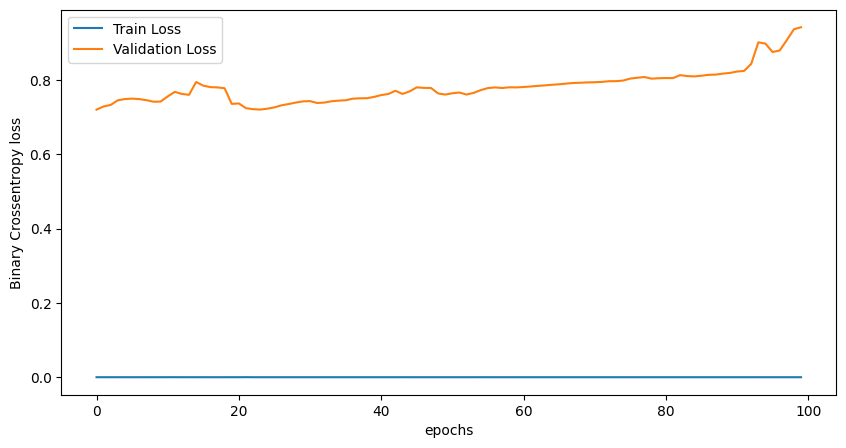

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()



### Evaluate the model


In [44]:
model.evaluate(x_train,y_train)

25/25 [==============================] - 1s 8ms/step - loss: 0.1883 - accuracy: 0.9663


[0.18833045661449432, 0.9662500023841858]

In [46]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.5228 - accuracy: 0.7700


[1.5227910280227661, 0.7699999809265137]

###Predict results for train and test


In [47]:
yprob_train = model.predict(x_train)
yprob_test = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [48]:
yprob_train[0:5]

array([[1.0000000e+00],
       [5.3599558e-07],
       [2.6462608e-09],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [50]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

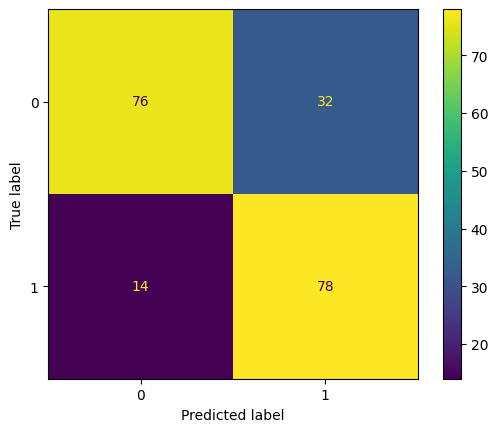

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       108
           1       0.71      0.85      0.77        92

    accuracy                           0.77       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.77      0.77       200



In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,ypred_train)

array([[372,  20],
       [  7, 401]])

### Save the model for future use


In [57]:
model.save("SentimentModel.keras")


### Load the model


In [59]:
from keras.models import load_model

In [60]:
nn = load_model("/content/SentimentModel.keras")
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               516352    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 549377 (2.10 MB)
Trainable params: 549377 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Out of sample prediction


In [61]:
s = "very testy food"
t = tfidf.transform([s]).toarray()
t

array([[0., 0., 0., ..., 0., 0., 0.]])

In [62]:
model.predict(t)

1/1 [==============================] - 0s 50ms/step


array([[0.9995172]], dtype=float32)

In [67]:
def predict_sentiment():
  text = input("Please enter restuaraunt review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print("Positive Review")
  else:
    print("Negative Review")
  return prob

In [69]:
predict_sentiment()

Please enter restuaraunt review : i love food
1/1 [==============================] - 0s 25ms/step
Positive Review


array([[1.]], dtype=float32)